In [13]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# 1) 데이터 불러오기
# -----------------------------

digits = datasets.load_digits()

In [14]:
# target에 어떤 숫자(클래스)가 있는지 확인
print("숫자 종류:", np.unique(digits.target))

숫자 종류: [0 1 2 3 4 5 6 7 8 9]


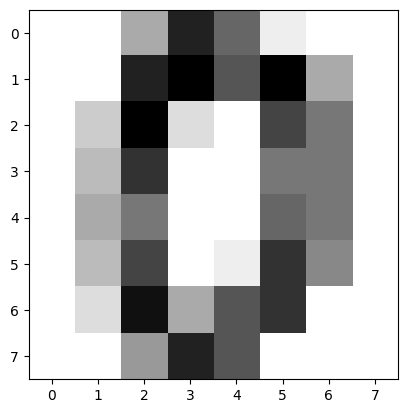

In [15]:
# 첫 번째 이미지(숫자)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
# -----------------------------
# 2) 특징(X)과 타겟(y) 분리
# -----------------------------

X = digits.data
y = digits.target

In [17]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
# -----------------------------
# 3) 데이터 스케일링
# -----------------------------

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# -----------------------------
# 4) 훈련/테스트 데이터 분리
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [21]:
# 각 데이터 크기 출력
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1257, 64), (540, 64), (1257,), (540,))

In [22]:
# -----------------------------
# 5) 모델 구성 / 학습 / 예측 / 평가
# -----------------------------

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Logistic Regression
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [23]:
# -----------------------------
# 6) 모델 정확도 출력
# -----------------------------

print("--- 모델 정확도 ---")
print(f"Decision Tree Accuracy      : {accuracy_dt:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Random Forest Accuracy      : {accuracy_rf:.4f}")

--- 모델 정확도 ---
Decision Tree Accuracy      : 0.8463
Logistic Regression Accuracy: 0.9704
Random Forest Accuracy      : 0.9741


In [24]:
# -----------------------------
# 7) 평가 지표
# -----------------------------

# Decision Tree
print("\n[Decision Tree]\n")
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred_dt))
print("\n분류 리포트:")
print(classification_report(y_test, y_pred_dt))

# Logistic Regression
print("\n[Logistic Regression]\n")
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred_lr))
print("\n분류 리포트:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
print("\n[Random Forest]\n")
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred_rf))
print("\n분류 리포트:")
print(classification_report(y_test, y_pred_rf))


[Decision Tree]

혼동 행렬:
[[49  0  0  1  1  1  0  0  0  1]
 [ 1 40  5  1  2  0  0  0  0  1]
 [ 3  3 35  3  0  0  0  1  1  1]
 [ 0  1  0 46  2  0  0  1  1  3]
 [ 0  3  1  1 51  0  2  1  0  1]
 [ 0  0  0  2  1 57  2  0  0  4]
 [ 0  0  0  1  2  0 50  0  0  0]
 [ 0  1  0  4  2  0  0 46  1  1]
 [ 0  6  0  1  0  0  0  1 33  2]
 [ 0  0  1  0  1  4  0  3  0 50]]

분류 리포트:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.74      0.80      0.77        50
           2       0.83      0.74      0.79        47
           3       0.77      0.85      0.81        54
           4       0.82      0.85      0.84        60
           5       0.92      0.86      0.89        66
           6       0.93      0.94      0.93        53
           7       0.87      0.84      0.85        55
           8       0.92      0.77      0.84        43
           9       0.78      0.85      0.81        59

    accuracy                           